In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical





In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))



In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [5]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)



Epoch 1/10
844/844 [==============================] - 17s 9ms/step - loss: 0.5100 - accuracy: 0.8511 - val_loss: 0.0724 - val_accuracy: 0.9800
Epoch 2/10
844/844 [==============================] - 7s 9ms/step - loss: 0.1474 - accuracy: 0.9631 - val_loss: 0.0806 - val_accuracy: 0.9763
Epoch 3/10
844/844 [==============================] - 8s 9ms/step - loss: 0.1091 - accuracy: 0.9719 - val_loss: 0.0595 - val_accuracy: 0.9850
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0856 - accuracy: 0.9777 - val_loss: 0.0596 - val_accuracy: 0.9847
Epoch 5/10
844/844 [==============================] - 7s 9ms/step - loss: 0.0739 - accuracy: 0.9807 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 6/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0684 - accuracy: 0.9827 - val_loss: 0.0671 - val_accuracy: 0.9818
Epoch 7/10
844/844 [==============================] - 8s 9ms/step - loss: 0.0610 - accuracy: 0.9850 - val_loss: 0.0466 - val_accuracy: 0.9883
Epoch

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0473 - accuracy: 0.9875
Test accuracy: 0.9875


In [7]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 4ms/step


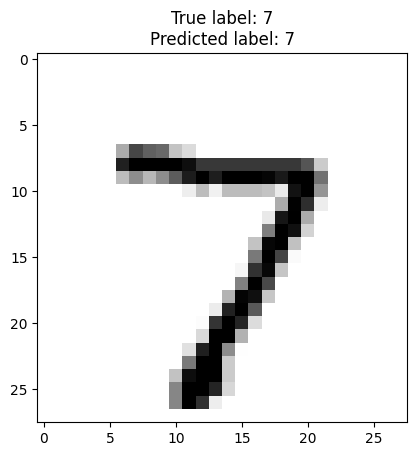

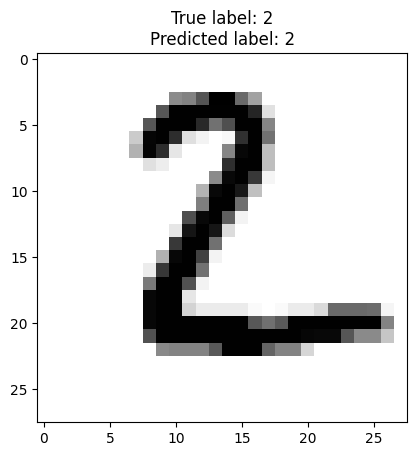

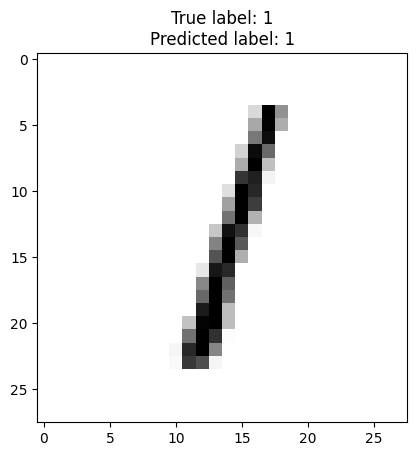

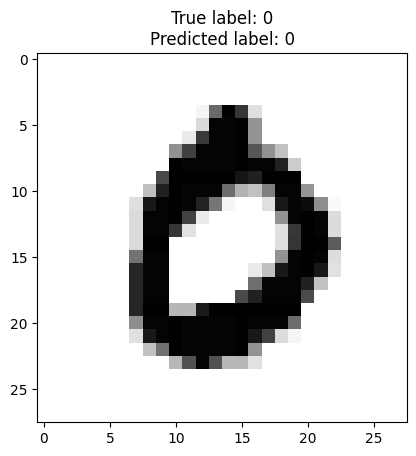

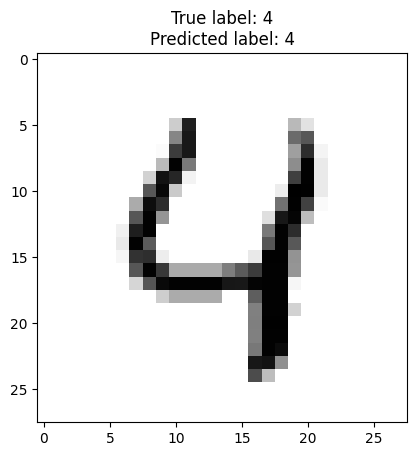

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
predictions = model.predict(test_images)

# Function to plot the image and prediction
def plot_image_and_prediction(index):
    plt.imshow(test_images[index].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"True label: {np.argmax(test_labels[index])}\nPredicted label: {np.argmax(predictions[index])}")
    plt.show()

# Plotting the first 5 test images with their predicted labels
for i in range(5):
    plot_image_and_prediction(i)
